In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge

# sklearn :: evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import normalize

from sklearn.model_selection import cross_val_score

sns.set_style('whitegrid')

# Problem definition

Apply regression models to predict Airbnb prices

# Load the data

In [2]:
df_train = pd.read_csv('data/train_29_1.csv')
df_test = pd.read_csv('data/test_29_1.csv')

#checking for the NANs
print('Number of NAN per feature in df_train: \n', df_train.isnull().sum())
print('Number of NAN per feature in df_test: \n', df_test.isnull().sum())

print('Columns in df_train: \n', df_train.columns)
print('Columns in df_test: \n', df_test.columns)

Number of NAN per feature in df_train: 
 id                   0
accommodates         0
bedrooms             0
cleaning_fee         0
number_of_reviews    0
bathrooms            0
log_price            0
Cahuenga Pass        0
Williamsburg         0
East Harlem          0
U Street Corridor    0
Hollywood Hills      0
Manhattan Beach      0
Fenway/Kenmore       0
West Adams           0
South End            0
East Boston          0
West Hollywood       0
Greenwich Village    0
Alphabet City        0
Lincoln Heights      0
North Hollywood      0
Pacific Palisades    0
West Los Angeles     0
Chinatown            0
Flatiron District    0
Westwood             0
Sunnyside            0
Richmond District    0
Hollywood            0
                    ..
60614                0
60610                0
60608                0
11231                0
10460                0
02114                0
90015                0
11222                0
90266                0
10010                0
10023           

In [3]:
#X_columns = df_train.columns.remove('id', 'log_price')
X = df_train.copy()
y = df_train['log_price']
del X['log_price']
del X['id']

#del X['cleaning_fee']

In [4]:
X.head(5)

,accommodates,bedrooms,cleaning_fee,number_of_reviews,bathrooms,Cahuenga Pass,Williamsburg,East Harlem,U Street Corridor,Hollywood Hills,...,Camper/RV,Townhouse,Condominium,House,Other,Apartment,Boutique hotel,Bed & Breakfast,Guesthouse,dist_metro
0,2,1.0,1,17,1.5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.010879
1,2,1.0,1,2,2.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.023517
2,5,2.0,1,25,1.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.078890
3,6,1.0,1,12,1.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.012907
4,6,2.0,1,71,1.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.071024


In [ ]:
y

0        3.806662
1        4.941642
2        4.941642
3        4.867534
4        4.836282
5        5.220356
6        5.686975
7        3.555348
8        3.555348
9        5.652489
10       4.442651
11       3.931826
12       5.010635
13       4.605170
14       4.094345
15       5.342334
16       3.688879
17       5.298317
18       4.595120
19       3.871201
20       5.010635
21       4.077537
22       5.700444
23       5.521461
24       5.521461
25       5.170484
26       4.605170
27       3.912023
28       4.744932
29       4.382027
           ...   
45838    4.700480
45839    5.857933
45840    4.304065
45841    3.912023
45842    4.442651
45843    4.343805
45844    5.298317
45845    4.682131
45846    3.688879
45847    4.595120
45848    4.700480
45849    5.978886
45850    3.912023
45851    5.393628
45852    4.317488
45853    5.662960
45854    4.828314
45855    5.298317
45856    3.806662
45857    6.363028
45858    4.941642
45859    3.637586
45860    4.382027
45861    5.298317
45862    5

# Model Training

In [ ]:
# split the data using sklearn
#X = pd.DataFrame(normalize(X, axis=0))
print(X.head(5))

threshold = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

   accommodates  bedrooms  cleaning_fee  number_of_reviews  bathrooms  \
0             2       1.0             1                 17        1.5   
1             2       1.0             1                  2        2.0   
2             5       2.0             1                 25        1.0   
3             6       1.0             1                 12        1.0   
4             6       2.0             1                 71        1.0   

   Cahuenga Pass  Williamsburg  East Harlem  U Street Corridor  \
0              0             0            0                  0   
1              0             0            0                  0   
2              0             0            0                  0   
3              0             0            0                  0   
4              0             0            0                  0   

   Hollywood Hills     ...      Camper/RV  Townhouse  Condominium  House  \
0                0     ...              0          0            0      1   
1           

# Model Evaluation

In [ ]:
models = [ ('RandomForestRegressor', RandomForestRegressor(n_estimators=300, n_jobs=-1)),
           # ('Ridge Regressor', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=False, random_state=None, solver='auto', tol=0.001))
]
#('GradientBoosting', GradientBoostingRegressor()),
#('LinearRegression', LinearRegression()),
#('LassoRegressor', Lasso(alpha=0.1)),
#('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
#('DecisionTreeRegressor', DecisionTreeRegressor())
#('KNeighborsRegressor', KNeighborsRegressor(5))

#('SVMRegressor', SVR()), - Slow - check the optimal C (find the function)
#('GaussianRegressor',GaussianProcessRegressor()),
#('SGDRegressor', SGDRegressor(), - bad results, check the parameters

k = 10
results = {}
for m in models:
    print('MODEL', m[0])
    results[m[0]] = {'mae':[], 'rmse':[]}
    kf = KFold(n_splits=k)
    for train_index, test_index in kf.split(X):
        X_train_k, X_test_k = X.values[train_index], X.values[test_index]
        y_train_k, y_test_k = y.values[train_index], y.values[test_index]
        model = m[1]
        model.fit(X_train_k, y_train_k.ravel())
        y_pred = model.predict(X_test_k)
        mae = mean_absolute_error(y_test_k, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test_k, y_pred))
        results[m[0]]['mae'].append(mae)
        results[m[0]]['rmse'].append(rmse)
    

MODEL RandomForestRegressor


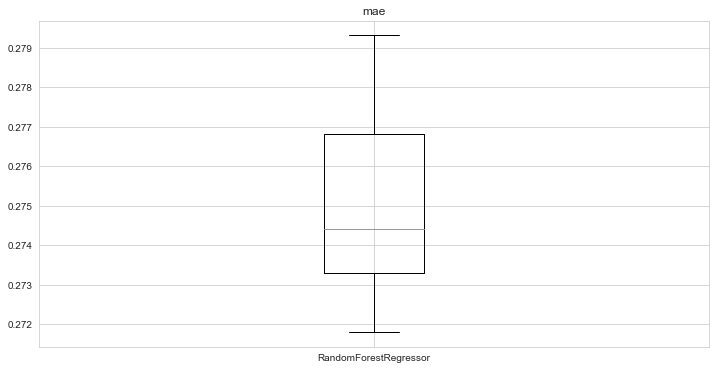

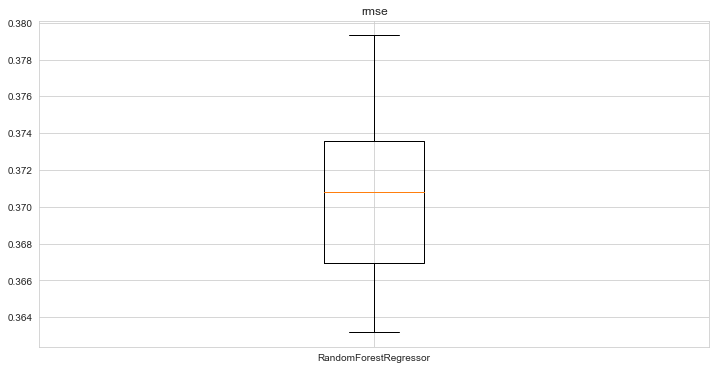

In [ ]:
for metric in ['mae', 'rmse']:
    values = []
    labels = []
    for model, result_values in results.items():
        for m, v in result_values.items():
            if m == metric:
                labels.append(model)
                values.append(v)
    plt.figure(figsize=(12,6))
    plt.title(metric)
    plt.boxplot(values)
    plt.xticks(range(1, len(labels)+1), labels, rotation='horizontal')
    plt.show()

# Finding the best parameters

In [ ]:
# #('SGDRegressor', SGDRegressor(), - bad results, check the parameters
# from sklearn.model_selection import cross_val_score

# print(len(n_range))
# k = 10
# results = []
# n_range=range(10,300,50)
# #n_range = 10.**np.linspace(-10, 5, 10)
# for n in n_range:
#     model = RandomForestRegressor(n_estimators=n, n_jobs=-1)
#     scores = cross_val_score(model, X, y, cv=10)
#     results.append(np.mean(scores))
# print('cross_val_score', np.mean(scores))

In [ ]:
# plt.plot(n_range,results)
# plt.xlabel('n_estimators')
# plt.ylabel('cross val score')

### Grid Search

In [ ]:
# from sklearn.model_selection import GridSearchCV
# # Create the parameter grid based on the results of random search 
# param_grid = {
# #    'bootstrap': [True],
# #    'max_depth': [80, 90, 100, 110],
# #    'max_features': [2, 3],
# #    'min_samples_leaf': [3, 4, 5],
# #    'min_samples_split': [8, 10, 12],
# #    'n_estimators': [100, 200, 300]
#      'alpha': 10.**np.linspace(-10, 5, 10),
# }
# # Create a based model
# rf = RandomForestRegressor()
# rdg = Ridge()
#  # Instantiate the grid search model  param_grid = param_grid, 
# grid_search = GridSearchCV(estimator = rdg, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
# grid_search.fit(X_train, y_train)
# grid_search.best_params_
# grid_search.best_score_
# grid_search.best_estimator_

In [ ]:
# grid_search.best_params_

In [ ]:
# grid_search.best_score_

### Checking one model

In [ ]:
# train a best model
model = RandomForestRegressor(n_estimators=300)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE', round(rmse, 4))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('Gradient Boosting Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()


In [ ]:
# from sklearn.metrics import roc_auc_score

# X_test["pred"] = model.predict_proba(X_test)

# print("Validation score:", roc_auc_score(y_test, y_pred))

In [ ]:
# 

### Feature importance

In [ ]:
#for i in range(len(X_test.columns)):
fi = []
for i, col in enumerate(X_test.columns):
    fi.append([col, model.feature_importances_[i]])


In [ ]:
features = pd.DataFrame(fi).sort_values(1, ascending=False)
print(type(features))
print(features)
useless = list(features.loc[features[1] < 0.00003, 0])
print(useless)

### Removing useless features and restarting the prediction

In [ ]:
# useless_list = list(useless)
# useless_list
# for i in range(len(useless_list)):
#     del X_train[useless_list[i]]
#     del X_test[useless_list[i]]
#     del df_test[useless_list[i]]
# # train a best model
# model = RandomForestRegressor(n_estimators=300)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print('RMSE', round(rmse, 4))
# plt.scatter(y_test, y_pred, alpha=0.3)
# plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
# plt.title('Gradient Boosting Regression')
# plt.xlabel('True Value')
# plt.ylabel('Predict Value')
# plt.show()

### Error Analysis

In [ ]:
df_new = pd.DataFrame(X_test).copy()
print(df_new.count())
print(len(y_pred))
df_new['log_price'] = y_test
df_new['prediction'] = y_pred
df_new['abs_error'] = abs(df_new['log_price']-df_new['prediction'])
df_new.sort_values(by='abs_error', ascending=False).round()
print(df_new.head())

In [ ]:
df_error = df_new[df_new['abs_error']>1]
#df_error.groupby()
df_error.corr()['abs_error'].dropna().sort_values()

# Prepare submission

In [ ]:
# print(df_test.columns)
# print(df_test['id'].count())

In [ ]:
# df_prediction = df_test.fillna(0.0)
# del df_prediction['id']
# #del df_prediction['cleaning_fee']
# print(df_prediction.columns)
# #df_prediction = pd.DataFrame(normalize(df_prediction, axis=0))

# df_test['log_price'] = model.predict(df_prediction)
# df_test[['id', 'log_price']]

In [ ]:
# df_test[['id', 'log_price']].to_csv('submission_8.csv', index=False)